<br>
<span style="font-family:Cursive;font-variant:small-caps;color:000000;"> <em>Dia 3</em>:</span>


# Fractal triangular

### Representació d'un fractal descrit amb 3 punts

<br>

<b> Descripció: </b>Aquest programa representa un fractal segons les iteracions que l'usuari defineix.

<b> Input: </b>Nombre de iteracions del fractal. <br>
<b> Output: </b>Gràfic del fractal demanat que varia en funció de les iteracions.

<b> Problemes: </b>La funció que representa el fractal no està ben optimitzada i requereix molt temps per compilar. El temps creix d'una forma exponencial. Ipywidgets encara enlenteix més el procés.</b>

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import matplotlib.lines as ln
import ipywidgets as wdg
%matplotlib inline

In [2]:
n = 18.0
arestes = [[]]
iteracions = 3
A = np.matrix([[0,1],[-1,0]])

sIt = wdg.IntSlider(value = iteracions, min = 0, max = 6, description = "Iteracions", continuous_update = True)

In [3]:
def funcio(iteracions):
    
    arestes = [[]]
    
    plt.figure(figsize=(n,n/2))

    axes = plt.gca()
    axes.set_xlim(0, n)
    axes.set_ylim(n/3-0.5, n-n/3-0.5)
    axes.set_aspect(1)
    axes.set_axis_off()

    caixa = ptc.FancyBboxPatch((0,0), n, n, "square", facecolor="#666666")
    axes.add_patch(caixa)

    for i in range(iteracions):
        arestes.append([])

    x = (0.0,n)
    y = (n/3,n/3)

    linia = ln.Line2D(x, y, color="orange")
    axes.add_line(linia)

    arestes[0].append(linia)

    for i in range(iteracions):

        for aresta in arestes[i]:
                     
            aresta.set_color("#666666")
            
            data = aresta.get_data()
            
            xdata = data[0]
            ydata = data[1]

            pi = np.array([xdata[0],ydata[0]])
            pf = np.array([xdata[1],ydata[1]])

            p = []
            vt = (pf-pi)*A

            p.append(pi)     

            p.append(((pf-pi)/3.0)+pi)
            p.append(((pf-pi)/2.0)+pi+(np.array(vt).flatten()/4))
            p.append((2.0/3.0)*(pf-pi)+pi)

            p.append(pf)

            for k in range(4):
                linia = ln.Line2D((p[k][0], p[k+1][0]),(p[k][1], p[k+1][1]), color="orange", lw = 2.2-0.3*iteracions)
                axes.add_line(linia)
                arestes[i+1].append(linia)



    return plt.show()

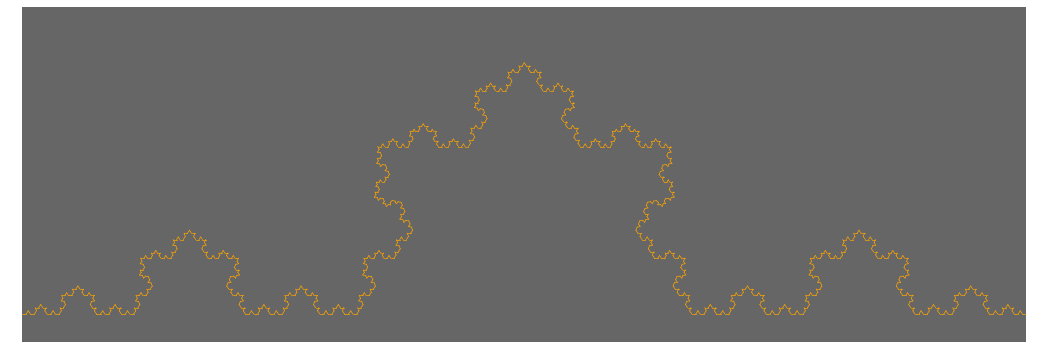

In [5]:
wdg.interact(funcio, iteracions = sIt)